In [ ]:
import urllib
from urllib import request
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
url = 'https://raw.githubusercontent.com/hqr999/Projeto-Dirigido/main/Ouro_Novo.xlsx%20-%20Planilha2(1).csv'
data = pd.read_csv(url,sep=",")

In [ ]:
# to explicitly convert the date column to type DATETIME
data['Data'] = pd.to_datetime(data['Data'])
data = data.set_index('Data')

In [ ]:
df = pd.DataFrame(data)
print(df)

            Abertura  Máxima   Mínima  Fechamento
Data                                             
2017-03-01   124.200  124.20  124.200     124.200
2017-03-02   123.500  123.50  121.500     123.500
2017-03-03   123.799  123.80  123.000     123.700
2017-03-06   122.999  123.00  121.500     121.700
2017-03-07   121.650  121.65  120.800     120.800
...              ...     ...      ...         ...
2022-02-22   308.000  309.50  305.000     305.000
2022-02-23   303.010  305.25  303.000     305.250
2022-02-24   319.000  323.00  312.000     317.500
2022-02-25   317.500  317.50  307.012     307.012
2022-03-02   312.501  316.00  311.010     315.010

[1231 rows x 4 columns]


In [ ]:
display(df)

,Abertura,Máxima,Mínima,Fechamento
Data,,,,
2017-03-01,124.200,124.20,124.200,124.200
2017-03-02,123.500,123.50,121.500,123.500
2017-03-03,123.799,123.80,123.000,123.700
2017-03-06,122.999,123.00,121.500,121.700
2017-03-07,121.650,121.65,120.800,120.800
...,...,...,...,...
2022-02-22,308.000,309.50,305.000,305.000
2022-02-23,303.010,305.25,303.000,305.250
2022-02-24,319.000,323.00,312.000,317.500


In [ ]:
#Média reamostragem semanal
data_columns = ['Abertura','Máxima','Mínima','Fechamento']
data_weekly_mean = data[data_columns].resample('W').mean() # W stands for weekly
data_weekly_mean

,Abertura,Máxima,Mínima,Fechamento
Data,,,,
2017-03-05,123.8330,123.833333,122.9000,123.8000
2017-03-12,121.8838,122.130000,121.1020,121.4700
2017-03-19,121.2978,121.590000,121.0600,121.3500
2017-03-26,122.8602,123.040000,122.1204,122.4600
2017-04-02,124.8924,125.558000,124.4602,125.1020
...,...,...,...,...
2022-02-06,304.7122,306.658000,302.0600,303.2764
2022-02-13,303.2600,307.178000,301.9540,305.2060
2022-02-20,307.3804,312.726000,306.0662,311.8000


In [ ]:
#Média com laminação semanal
data_columns = ['Abertura','Máxima','Mínima','Fechamento']
data_7d_rol = data[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol

,Abertura,Máxima,Mínima,Fechamento
Data,,,,
2017-03-01,NaN,NaN,NaN,NaN
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,NaN,NaN,NaN,NaN
2017-03-06,122.845429,123.021429,121.957143,122.571429
2017-03-07,122.388286,122.564286,121.430000,122.078571
...,...,...,...,...
2022-02-22,310.358714,315.750000,306.257571,312.394571
2022-02-23,311.287286,314.464286,306.973143,310.967429
2022-02-24,NaN,NaN,NaN,NaN


In [ ]:
#Média com laminação anual
data_365d_rol = data[data_columns].rolling(window = 365, center = True).mean()

Text(0.5, 1.0, 'Tendência de fechamento de preço')

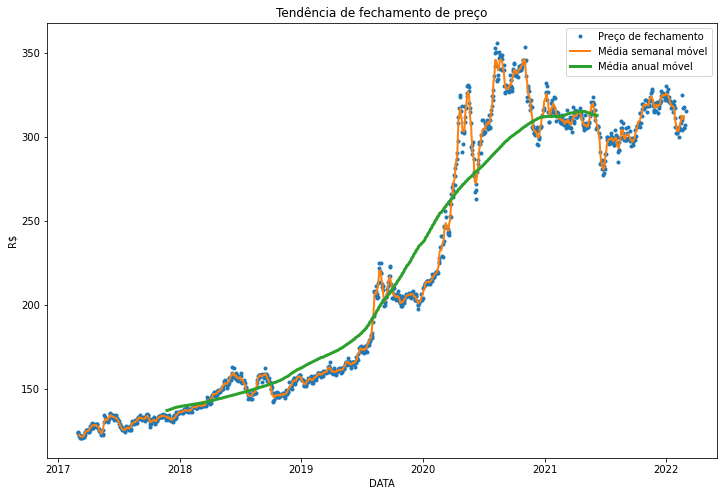

In [ ]:
#Gráfico Fechamento do Ouro
plt.figure(figsize=(12,8))
#Fechamento diário
plt.plot(df['Fechamento'],'.',label='Preço de fechamento')
#Média semanal móvel
plt.plot(data_7d_rol['Fechamento'], linewidth=2, label='Média semanal móvel')
#Média anual móvel
plt.plot(data_365d_rol['Fechamento'], linewidth=3, label='Média anual móvel')
plt.xlabel('DATA')
plt.ylabel('R$')
plt.legend()
plt.title('Tendência de fechamento de preço')

In [ ]:
#Vamos tirar a tendência dos nossos dados,e deixar a nossa série temporal estacionária
data_first_order_diff = data[data_columns].diff()
print(data_first_order_diff)

            Abertura  Máxima  Mínima  Fechamento
Data                                            
2017-03-01       NaN     NaN     NaN         NaN
2017-03-02    -0.700   -0.70  -2.700      -0.700
2017-03-03     0.299    0.30   1.500       0.200
2017-03-06    -0.800   -0.80  -1.500      -2.000
2017-03-07    -1.349   -1.35  -0.700      -0.900
...              ...     ...     ...         ...
2022-02-22     1.000   -8.50   2.210     -12.000
2022-02-23    -4.990   -4.25  -2.000       0.250
2022-02-24    15.990   17.75   9.000      12.250
2022-02-25    -1.500   -5.50  -4.988     -10.488
2022-03-02    -4.999   -1.50   3.998       7.998

[1231 rows x 4 columns]


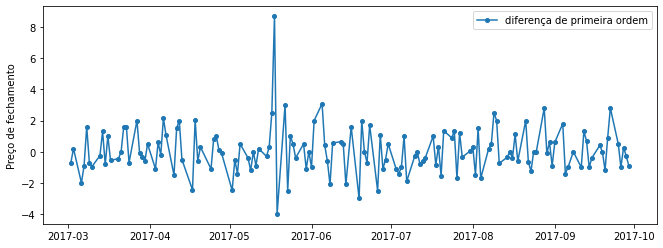

In [ ]:
start, end = '2017-03', '2017-09'

fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(data_first_order_diff.loc[start:end, 'Fechamento'],
marker='o', markersize=4, linestyle='-', label='diferença de primeira ordem')
ax.set_ylabel('Preço de fechamento')
ax.legend();

<AxesSubplot:xlabel='Data'>

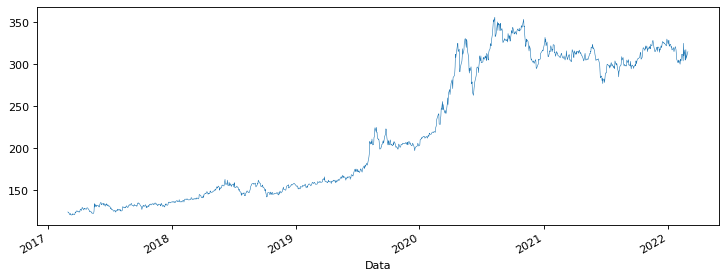

In [ ]:
plt.figure(figsize=(11,4), dpi= 80)
data['Fechamento'].plot(linewidth = 0.5)

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))#Erro Médio Absoluto
    print('MSE: ', round(mse,4))#Erro Quadrático Médio
    print('RMSE: ', round(np.sqrt(mse),4))#Erro Quadrado Médio de Raiz

In [ ]:
# Cria um novo dataframe a partir do fechamento
data_consumption = data[['Fechamento']]
# Insere uma nova coluna com os valores de fechamento do dia anterior
data_consumption.loc[:,'Ontem'] = data_consumption.loc[:,'Fechamento'].shift()
# Insere uma nova coluna com a diferença de fechamento de ontem e antes de ontem
data_consumption.loc[:,'Diff'] = data_consumption.loc[:,'Ontem'].diff()
#Adicionamos as outras colunas
data_consumption.loc[:,'Abertura'] = data[['Abertura']]
data_consumption.loc[:,'Máxima'] = data[['Máxima']]
data_consumption.loc[:,'Mínima'] = data[['Mínima']]

# dropping NAs
data_consumption = data_consumption.dropna()
print(data_consumption)

            Fechamento    Ontem    Diff  Abertura  Máxima   Mínima
Data                                                              
2017-03-03     123.700  123.500  -0.700   123.799  123.80  123.000
2017-03-06     121.700  123.700   0.200   122.999  123.00  121.500
2017-03-07     120.800  121.700  -2.000   121.650  121.65  120.800
2017-03-08     122.400  120.800  -0.900   121.770  122.40  121.000
2017-03-09     121.700  122.400   1.600   122.000  122.60  121.700
...                ...      ...     ...       ...     ...      ...
2022-02-22     305.000  317.000   7.000   308.000  309.50  305.000
2022-02-23     305.250  305.000 -12.000   303.010  305.25  303.000
2022-02-24     317.500  305.250   0.250   319.000  323.00  312.000
2022-02-25     307.012  317.500  12.250   317.500  317.50  307.012
2022-03-02     315.010  307.012 -10.488   312.501  316.00  311.010

[1229 rows x 6 columns]
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarni

In [ ]:
X_train = data_consumption.loc[:'2021-03'].drop(['Fechamento'], axis = 1)
y_train = data_consumption.loc[:'2021-03', 'Fechamento']

X_test = data_consumption.loc['2022-03'].drop(['Fechamento'], axis = 1)
y_test = data_consumption.loc['2022-03', 'Fechamento']

In [ ]:
# Spot Check Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network  import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

LR: 0.992436 (0.004177)
NN: 0.992883 (0.004034)
KNN: -0.663595 (1.375323)
RF: -0.620193 (1.401746)
SVR: -28.482643 (41.196734)


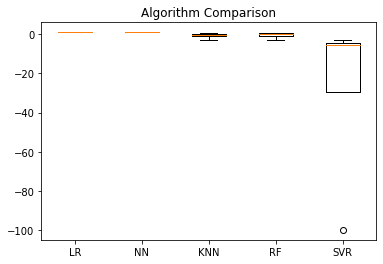

In [ ]:

models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 100))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=4)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
 predict = np.array(predict)
 actual = np.array(actual)
 distance = predict - actual
 square_distance = distance ** 2
 mean_square_distance = square_distance.mean()
 score = np.sqrt(mean_square_distance)
 return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)

gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [ ]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  1.0
mean_squared_log_error:  0.0
r2:  nan
MAE:  1.2919
MSE:  1.6691
RMSE:  1.2919
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


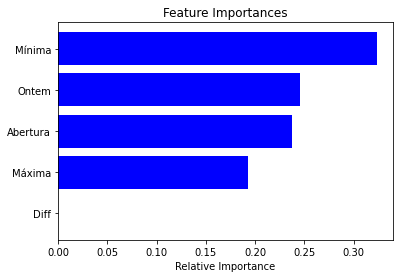

In [ ]:
imp = best_model.feature_importances_
features = X_train.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=416be4a5-1e2e-4be1-bf29-bebc5e018d70' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>